In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [11]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [16]:
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [17]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [18]:
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [21]:
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [22]:
small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


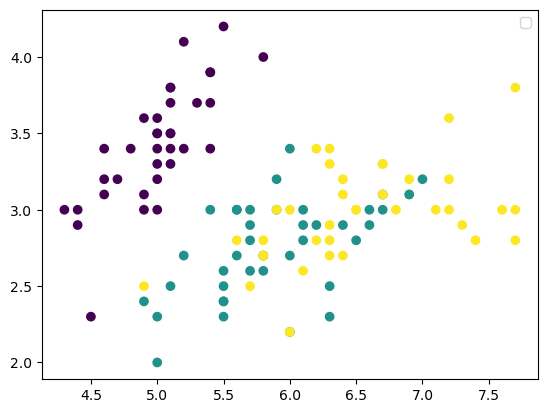

In [23]:
plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)
plt.legend()
plt.show()

In [24]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
lda_small.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

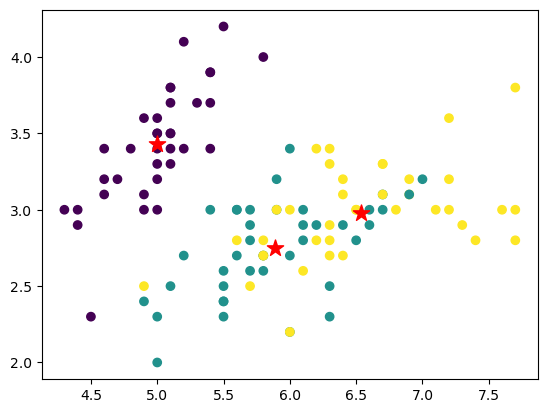

In [27]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=y_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

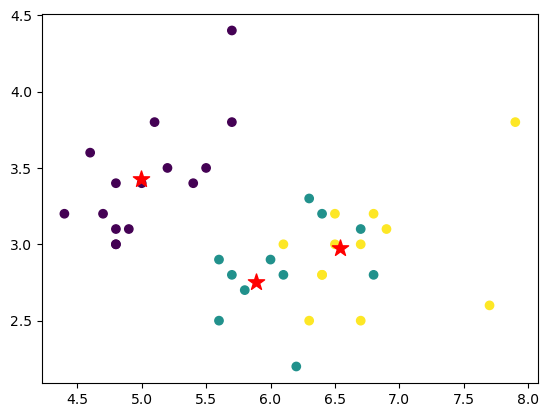

In [28]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=y_test)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [32]:
lda_small.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [33]:
accuracy_score(y_test, lda_small.predict(small_test))

0.868421052631579

In [34]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [48]:
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

/var/folders/s4/xv06r9r15b18nmydcpdrl0300000gn/T/ipykernel_56976/2746125249.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', s=60)


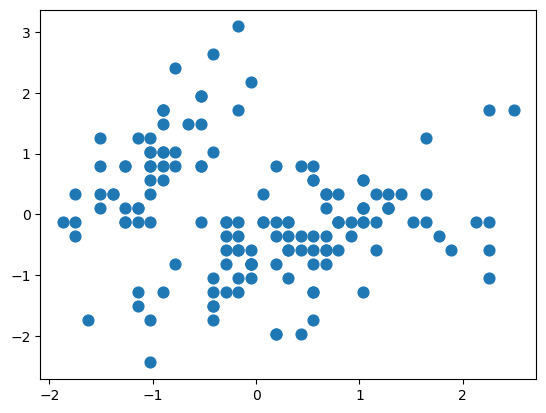

In [49]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', s=60)

In [29]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

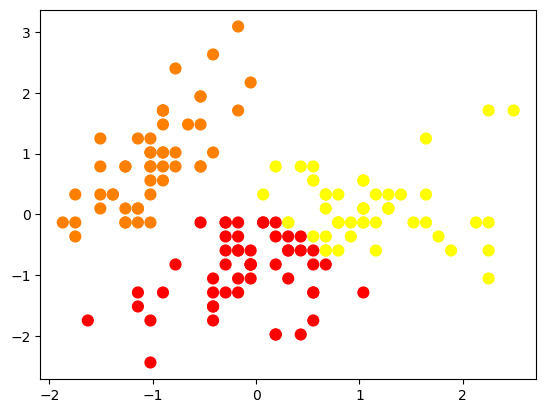

In [55]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)